https://colab.research.google.com/github/mepky/image_processing-opencv-/blob/master/Assignment.ipynb

In [73]:
%matplotlib inline

In [74]:
#!sudo apt install tesseract-ocr
#!pip install pytesseract

In [75]:
#!sudo apt install poppler-utils

In [76]:
# https://www.geeksforgeeks.org/convert-pdf-to-image-using-python/
#!pip install pdf2image

In [77]:
import pandas as pd
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [78]:
import matplotlib.pyplot as plt
import cv2

In [79]:
from cv2_plt_imshow import cv2_plt_imshow, plt_format
# import module
from pdf2image import convert_from_path


In [80]:
#from google.colab import drive
#drive.mount('/content/drive')

In [81]:
import os
cwd = os.getcwd()

In [82]:
path2image = cwd + "/AgeGenderDoB.png"

In [83]:
im = cv2.imread(path2image)##, cv2.IMREAD_COLOR)

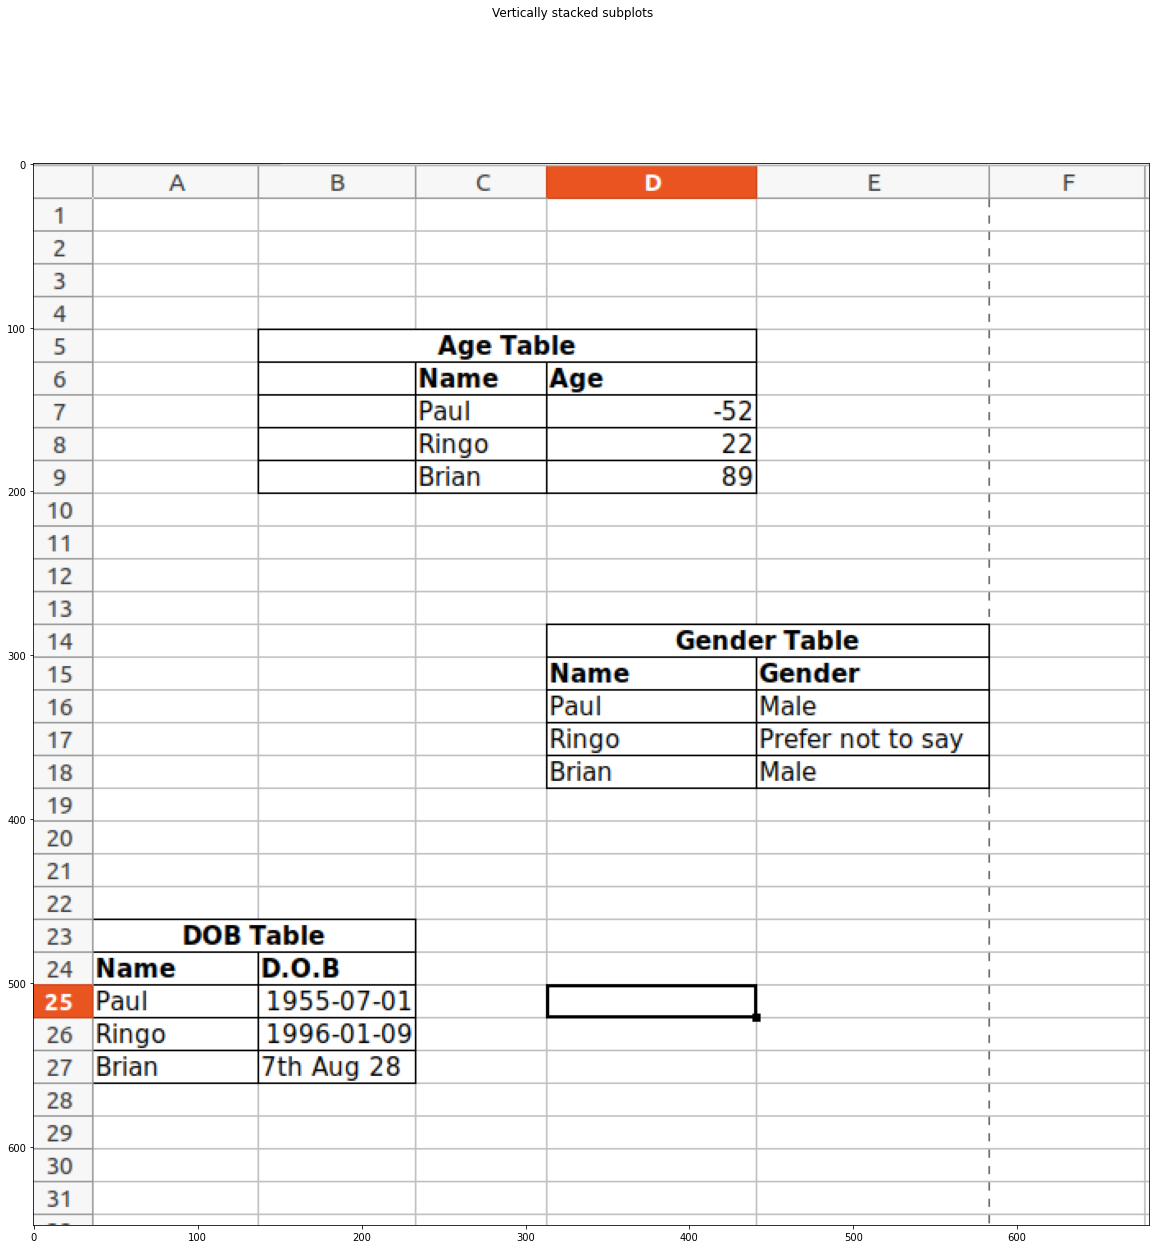

In [84]:
#im = cv2.bitwise_not(im)
#im = cv2.bitwise_not(im)
#plt.imshow(im)
#plt.show()
#cv2_imshow(im)
#cv2_plt_imshow(im)
fig, axs = plt.subplots(1 , figsize=(20,20))
fig.suptitle('Vertically stacked subplots')
axs.imshow(plt_format(im))

In [85]:
os.environ["TESSDATA_PREFIX"] = cwd

In [86]:
image_path_in_colab=path2image
extract = pytesseract.image_to_string(Image.open(image_path_in_colab))
#print(extract)
#type(extract)

In [87]:
#extract=''.join(extract)
#type(extract)

In [88]:
#extract=extract.split('\n')

#extract

In [89]:
#l=list()
#for i in extract:
#  if i!='' and i!=' ':
#    l.append(i)
#l


In [90]:
#import pandas as pd

In [91]:
#column=l[8].split(' ')

In [92]:
filename = path2image

# read the image and get the dimensions
img = cv2.imread(filename)
h, w, _ = img.shape # assumes color image

# run tesseract, returning the bounding boxes
boxes = pytesseract.image_to_boxes(img,config = " -c tessedit_create_boxfile=1" ) # also include any config options you use
boxes

'~ 137 546 442 547 0\nA 247 531 259 543 0\ng 251 528 267 543 0\ne 259 528 280 540 0\nT 285 531 296 543 0\na 295 531 304 540 0\nb 296 531 313 543 0\nl 306 531 320 543 0\ne 321 531 331 540 0\n~ 137 526 442 527 0\n| 315 508 321 523 0\nA 315 511 327 523 0\ng 327 508 337 520 0\ne 338 511 348 520 0\n~ 137 506 442 507 0\nP 236 491 244 503 0\na 245 491 252 500 0\nu 246 491 262 503 0\nl 254 491 266 503 0\n- 415 495 420 496 0\n5 415 491 427 503 0\n2 421 491 438 503 0\n~ 137 486 442 487 0\nR 236 471 245 483 0\ni 246 471 248 483 0\nn 250 471 258 480 0\ng 259 468 268 480 0\no 269 471 278 480 0\n2 421 471 428 483 0\n2 431 471 438 483 0\n~ 137 466 442 467 0\n~ 137 446 138 547 0\n~ 233 446 234 527 0\nB 236 451 245 463 0\nr 240 451 252 463 0\ni 246 451 254 463 0\na 256 451 263 460 0\nn 265 451 273 460 0\n8 421 451 429 463 0\n9 421 451 439 463 0\n| 435 451 439 463 0\n~ 137 446 442 447 0\nD 92 171 104 183 0\nO 92 171 115 183 0\nB 117 171 127 183 0\nT 132 171 140 183 0\na 132 171 151 183 0\nb 144 171 160 

In [93]:
for b in boxes.splitlines():
    b = b.split(' ')
    

In [94]:

# draw the bounding boxes on the image
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)


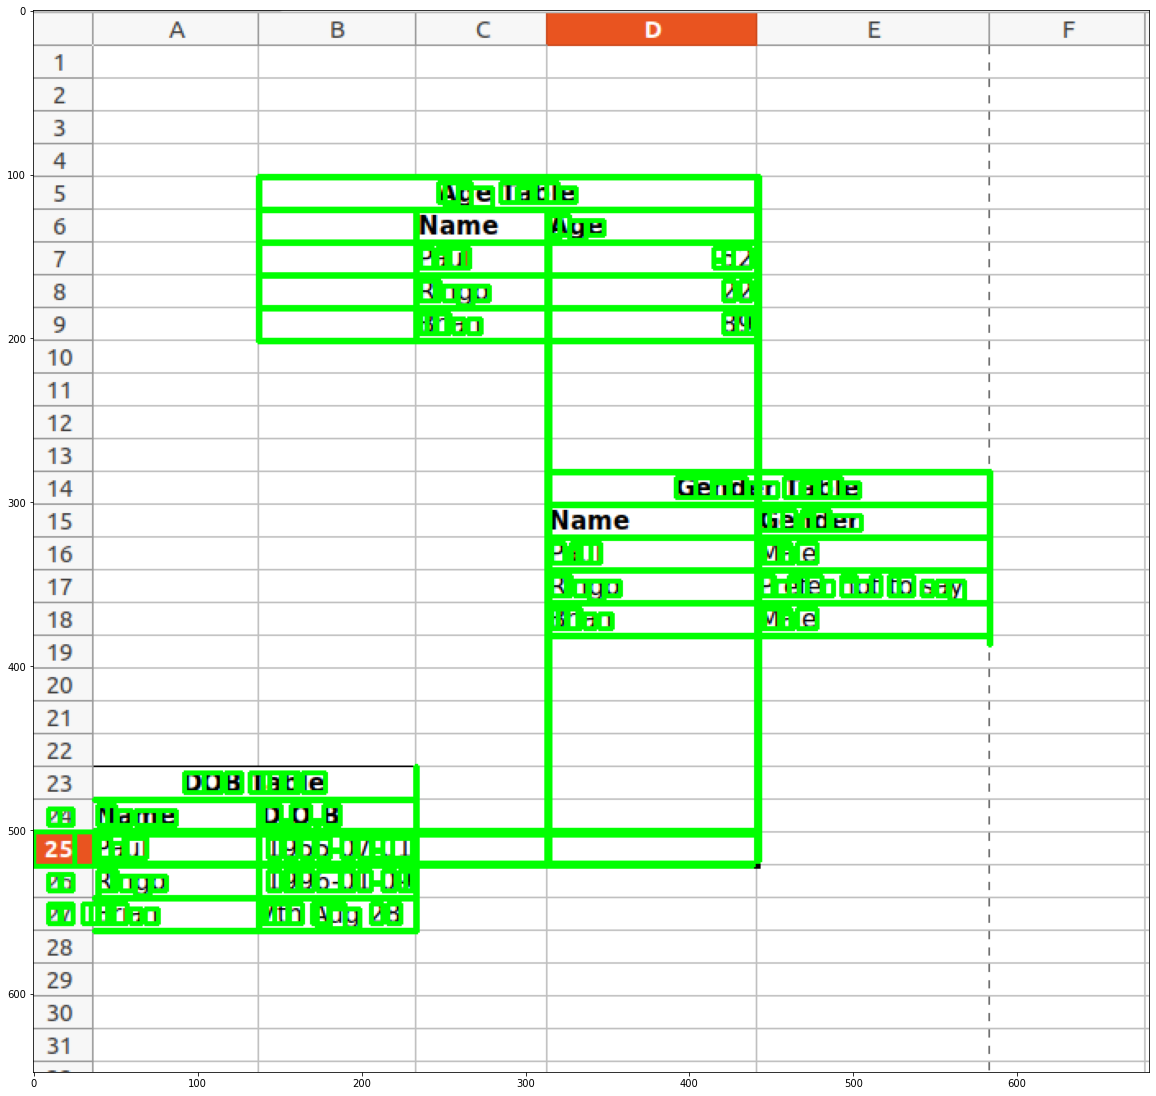

In [95]:
# show annotated image and wait for keypress
#cv2.imshow(filename, img)
#cv2.waitKey(0)

#im = cv2.bitwise_not(img)
#plt.figure(figsize=(20, 20))
#plt.imshow(img)
#plt.show()
#cv2_plt_imshow(img)
fig, axs = plt.subplots(1 , figsize=(20,20))
axs.imshow(plt_format(img))

In [96]:

from pytesseract import Output

filename = path2image

image = cv2.imread(filename)
#rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#results = pytesseract.image_to_data(rgb, output_type=Output.DICT)
#config = ('- 1 eng -- oem 3 -- psm 3') # Note that it is double “-” for oem and psm
#data = pytesseract.image_to_data(grey_image, config = config, output_type='data.frame')
data = pytesseract.image_to_data(grey_image,lang='eng', output_type='data.frame')
data['text'].unique()

array([nan, 'A', 'B', 'c', 'I', ' ', '4', ':', '5', 'Age', 'Table', ';',
       '6', '[Name', '_', '|Age', '|', '7', 'Paul', '-52|', ')', '>',
       'Ringo', '22', 'Brian', '89', '14', 'Gender', '15', 'Name', '16',
       'Male', '17', 'Prefer', 'not', 'to', 'say', '18', '23', 'DOB',
       '24', 'D.0.B', 'Elipaul', '1955-07-01]', '1996-01-09', '[7th',
       'Aug', '28'], dtype=object)

In [116]:
data = data[pd.notna(data['text'])]
data = data[data['text'] != ' ']
data['right'] = data['left'] + data['width']
data['bottom'] = data['top'] + data['height']
data.head(6)
data.to_csv('coords.csv')

In [98]:
filename = path2image
image = cv2.imread(filename)
for index, row in data.iterrows():
    #print(row['c1'], row['c2'])
    # draw the bounding boxes on the image
    # Start coordinate, here (5, 5)
    # represents the top left corner of rectangle
    start_point = ( row['left'],row['top'])
    
    row_scaled = row['top'] + row['height'] * 1.02
    # Ending coordinate, here (220, 220)
    # represents the bottom right corner of rectangle
    end_point = ( row['right'],row['bottom'])
    #print(end_point)  
    # Blue color in BGR
    color = (255, 0, 0)
      
    # Line thickness of 2 px
    thickness = 2
      
    # Using cv2.rectangle() method
    # Draw a rectangle with blue line borders of thickness of 2 px
    image = cv2.rectangle(image, start_point, end_point, color, thickness)

(93, 17)
(190, 17)
(279, 17)
(442, 22)
(20, 97)
(584, 97)
(19, 117)
(280, 120)
(331, 117)
(584, 117)
(20, 137)
(284, 137)
(304, 144)
(348, 140)
(584, 137)
(20, 157)
(266, 166)
(438, 166)
(584, 157)
(20, 177)
(584, 177)
(20, 197)
(584, 207)
(278, 180)
(438, 177)
(270, 207)
(439, 197)
(24, 307)
(454, 297)
(504, 297)
(23, 327)
(364, 327)
(505, 317)
(24, 347)
(346, 347)
(478, 337)
(24, 367)
(358, 360)
(487, 357)
(517, 357)
(537, 357)
(567, 360)
(24, 387)
(350, 387)
(478, 377)
(21, 477)
(127, 477)
(178, 477)
(24, 497)
(87, 497)
(187, 497)
(69, 526)
(230, 517)
(81, 547)
(231, 537)
(73, 567)
(163, 557)
(198, 560)
(224, 557)


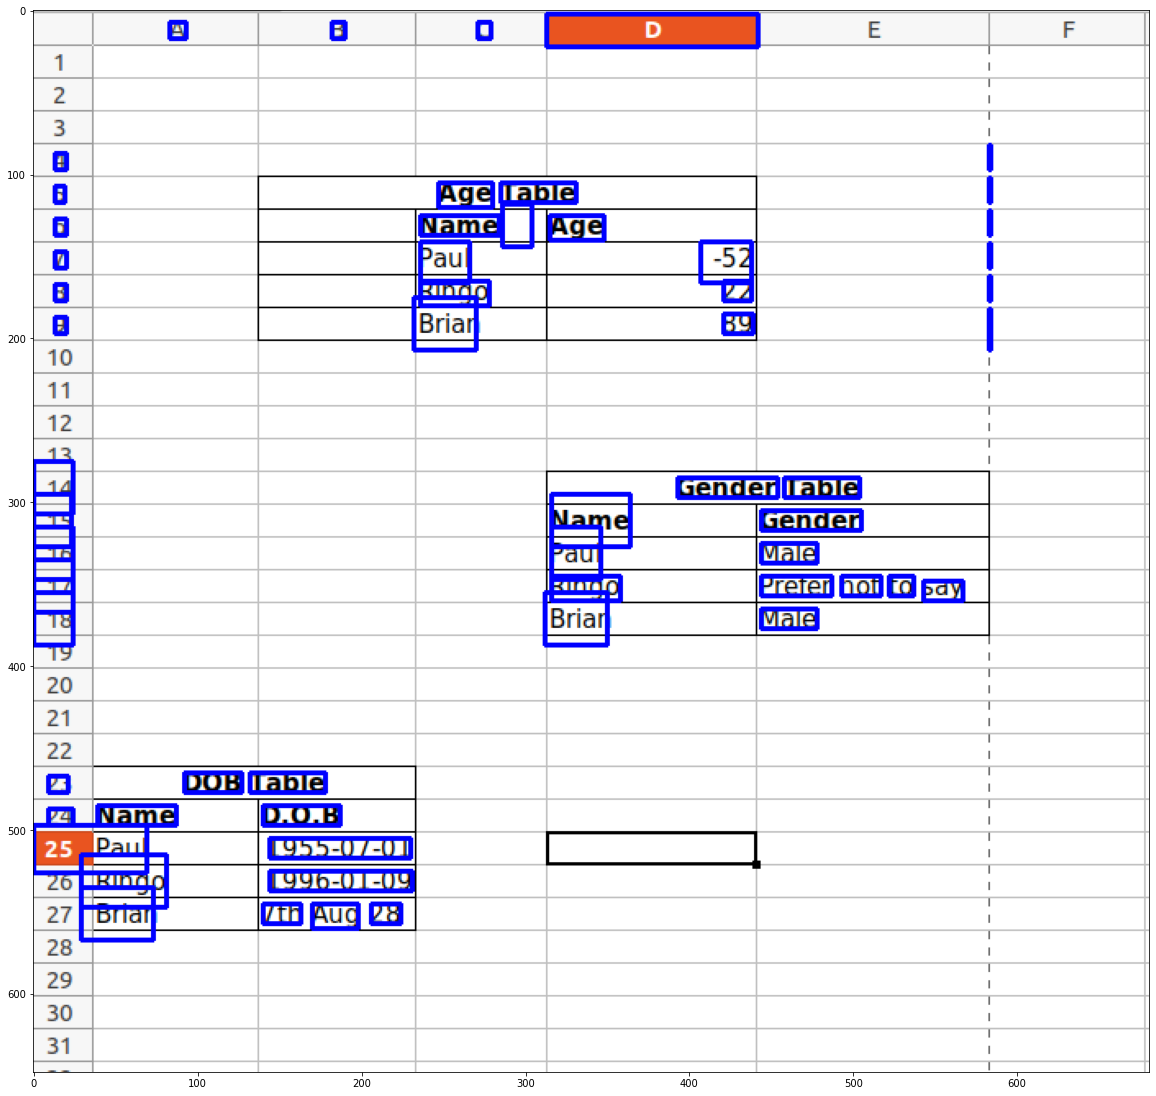

In [99]:
fig, axs = plt.subplots(1 , figsize=(20,20))
axs.imshow(plt_format(image))

In [100]:
paragraphs = data.groupby(['block_num','par_num'])['text'].apply(' '.join).reset_index()
#paragraphs

In [101]:
paragraph_left = data.groupby(['block_num','par_num'])['left'].agg('min').reset_index()
paragraph_top = data.groupby(['block_num','par_num'])['top'].agg('min').reset_index()
paragraph_bottom = data.groupby(['block_num','par_num'])['bottom'].agg('max').reset_index()
#paragraph_boxes
#df1.groupby(['State','Product'])['Sales'].agg('max').reset_index()


In [102]:
#paragraph_line_width = data.groupby(['block_num','par_num','line_num'])['left'+'width'].agg('sum').reset_index()
#paragraph_line_width.head(5)

In [103]:
paragraph_para_right = data.groupby(['block_num','par_num'])['right'].agg('max').reset_index()
paragraph_para_right.head(4)

,block_num,par_num,right
0,1,1,442
1,4,1,584
2,8,1,439
3,14,1,505


In [104]:
paragraph_line_height = data.groupby(['block_num','par_num','line_num'])['height'].agg('max').reset_index()
paragraph_para_height = paragraph_line_height.groupby(['block_num','par_num'])['height'].agg('sum').reset_index()
paragraph_para_height.head(5)

,block_num,par_num,height
0,1,1,20
1,4,1,121
2,8,1,47
3,14,1,64
4,14,2,32


In [105]:
df = paragraph_left
#df = df.join(paragraph_top,lsuffix='_caller', rsuffix='_other')
#df1 = df.set_index('block_num').join(paragraph_top.set_index('block_num'))
df = df.merge(paragraph_top, on=['block_num','par_num'], how='left')
df = df.merge(paragraph_para_right, on=['block_num','par_num'], how='left')
df = df.merge(paragraph_para_height, on=['block_num','par_num'], how='left')
df = df.merge(paragraph_bottom, on=['block_num','par_num'], how='left')
#df = df.join(paragraph_para_width)
#df = df.join(paragraph_para_height)
df.head(4)

,block_num,par_num,left,top,right,height,bottom
0,1,1,83,2,442,20,22
1,4,1,13,82,584,121,207
2,8,1,232,165,439,47,207
3,14,1,0,275,505,64,327


In [106]:
filename = path2image
#image = cv2.imread(filename)
for index, row in df.iterrows():
    #print(row['c1'], row['c2'])
    # draw the bounding boxes on the image
    # Start coordinate, here (5, 5)
    # represents the top left corner of rectangle
    start_point = ( row['left'],row['top'])
    
    # Ending coordinate, here (220, 220)
    # represents the bottom right corner of rectangle
    end_point = ( row['right'],row['bottom'])
    print(end_point)  
    # Red color in BGR
    color = (0, 0, 255)
      
    # Line thickness of 2 px
    thickness = 2
      
    # Using cv2.rectangle() method
    # Draw a rectangle with blue line borders of thickness of 2 px
    image = cv2.rectangle(image, start_point, end_point, color, thickness)

(442, 22)
(584, 207)
(439, 207)
(505, 327)
(478, 347)
(567, 387)
(231, 567)


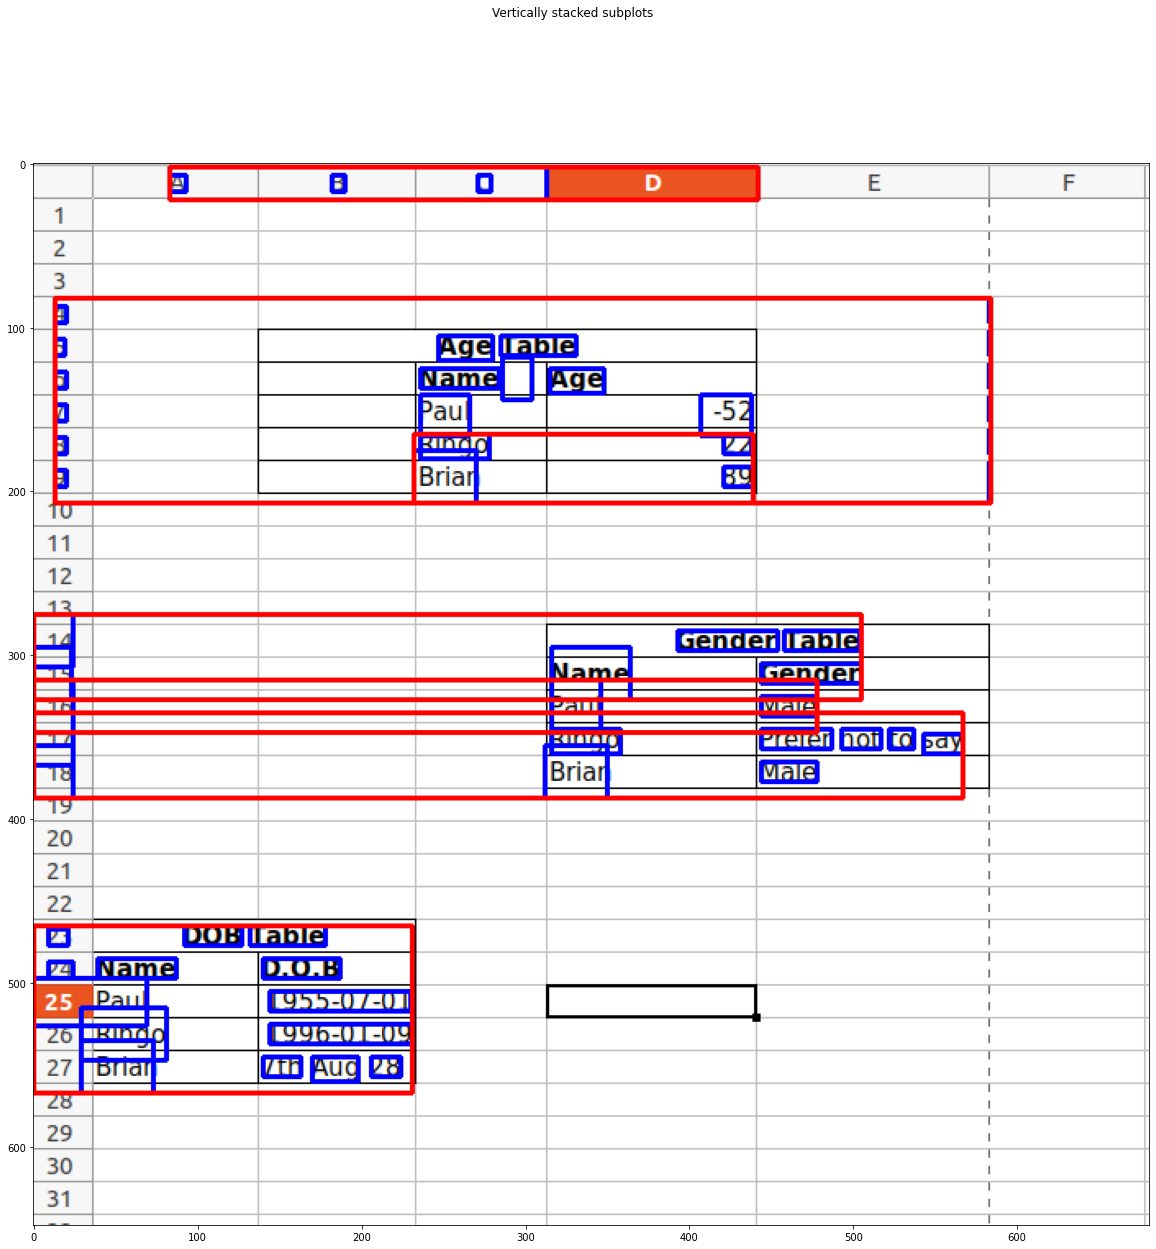

In [107]:
#cv2_plt_imshow(image)
fig, axs = plt.subplots(1 , figsize=(20,20))
fig.suptitle('Vertically stacked subplots')
axs.imshow(plt_format(image))

img = cv2.imread('invoice-sample.jpg')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())

date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
    	if re.match(date_pattern, d['text'][i]):
	        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
	        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)

In [108]:
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img,lang='eng', config=custom_config)

'A B c D E F\n1 .\n2 :\n3 :\n4 :\n5 ___ Adeliedle | :\n6 ____ Name Mge | :\n7 | Pad ] 2 HiA :\n8 B | A2 :\n9 [ Fieo ] = oW :\n10 :\n1 :\n12 :\n13 :\n14 | Gehdénibdle |\n15 Name  [GBiden |\n16 pill _ FRe |\n17 Hogo PfenoiDeay) |\n18 ien  BRe |\n19 !\n20 :\n21 :\n22 :\n23 :\no8 flame  OOE | :\ne JUSReHWERN | :\n0 [ [T !\nomikeo 6§ 0 | :\n28 :\n29 :\n30 :\n31 :\n\x0c'

In [109]:
originalImage = cv2.imread(filename)
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
  
(thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)

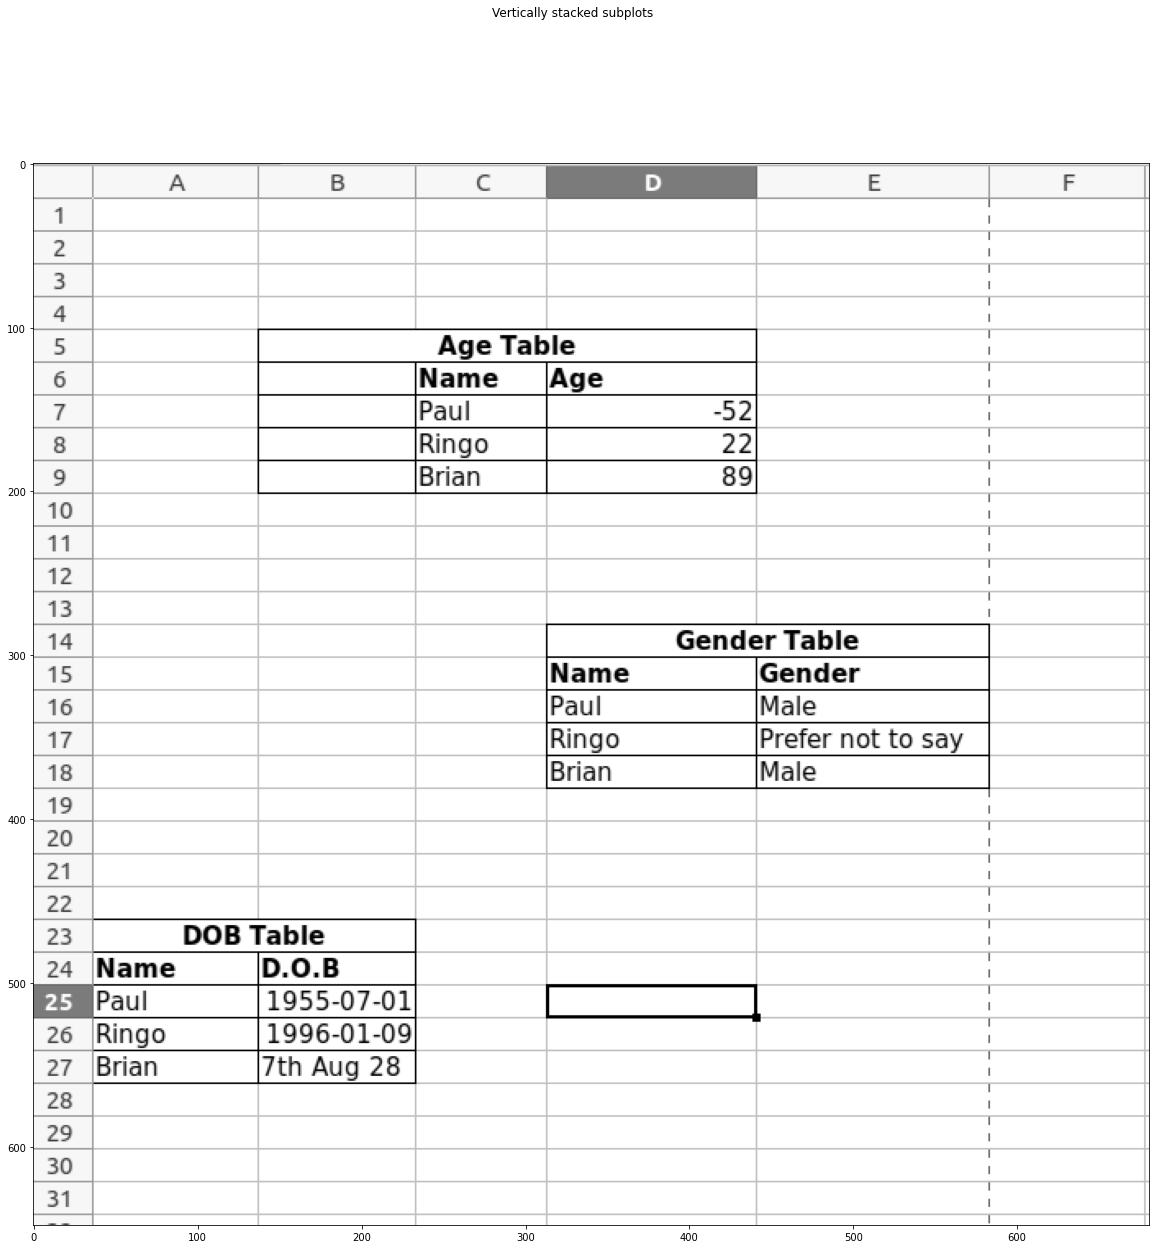

In [110]:

originalImage = cv2.imread(filename)
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
  
#img = cv2.imread(filename, cv2.IMREAD_UNCHANGED)
#cv2_plt_imshow(grayImage)
fig, axs = plt.subplots(1 , figsize=(20,20))
fig.suptitle('Vertically stacked subplots')
axs.imshow(plt_format(grayImage))

In [111]:
import re

In [112]:
from pytesseract import Output

filename = path2image
img = cv2.imread(filename)
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())
keys

['level',
 'page_num',
 'block_num',
 'par_num',
 'line_num',
 'word_num',
 'left',
 'top',
 'width',
 'height',
 'conf',
 'text']

In [113]:
## Pattern Matching

-1

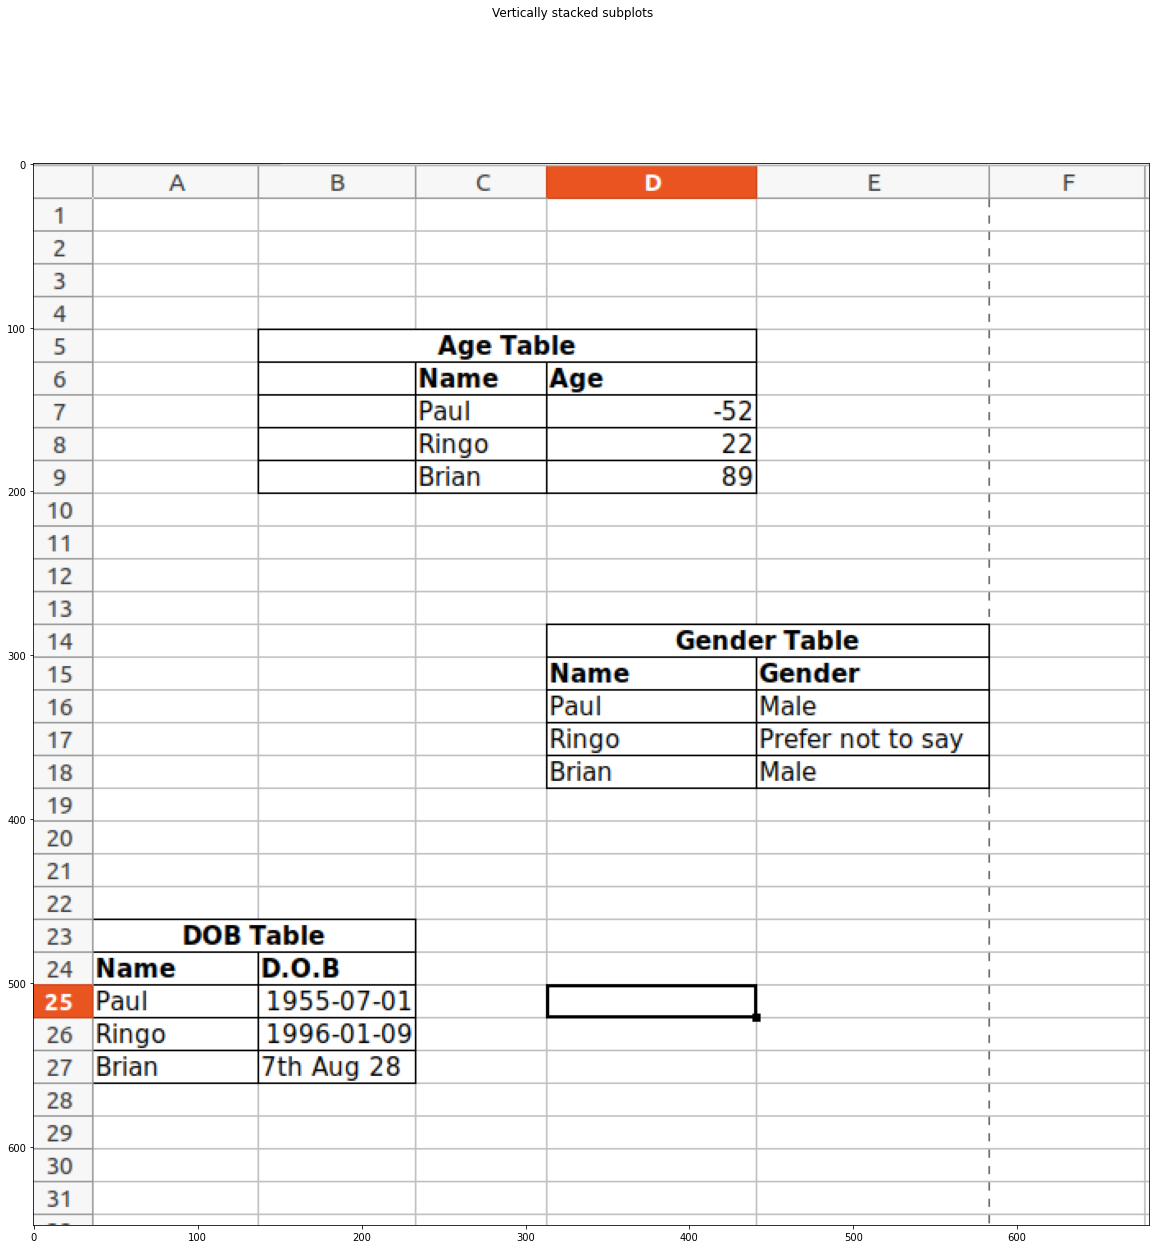

In [114]:

#date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'
#^The        matches any string that starts with The -> Try it!
#end$        matches a string that ends with end
#^The end$   exact string match (starts and ends with The end)
#roar        matches any string that has the text roar in it
text_pattern = 'Age Table'
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
    	#if re.match(date_pattern, d['text'][i]):
      if re.match(text_pattern, d['text'][i]):
	        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
	        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

#cv2.imshow('img', img)
#cv2_plt_imshow(img)
fig, axs = plt.subplots(1 , figsize=(20,20))
fig.suptitle('Vertically stacked subplots')
axs.imshow(plt_format(img))
cv2.waitKey(0)

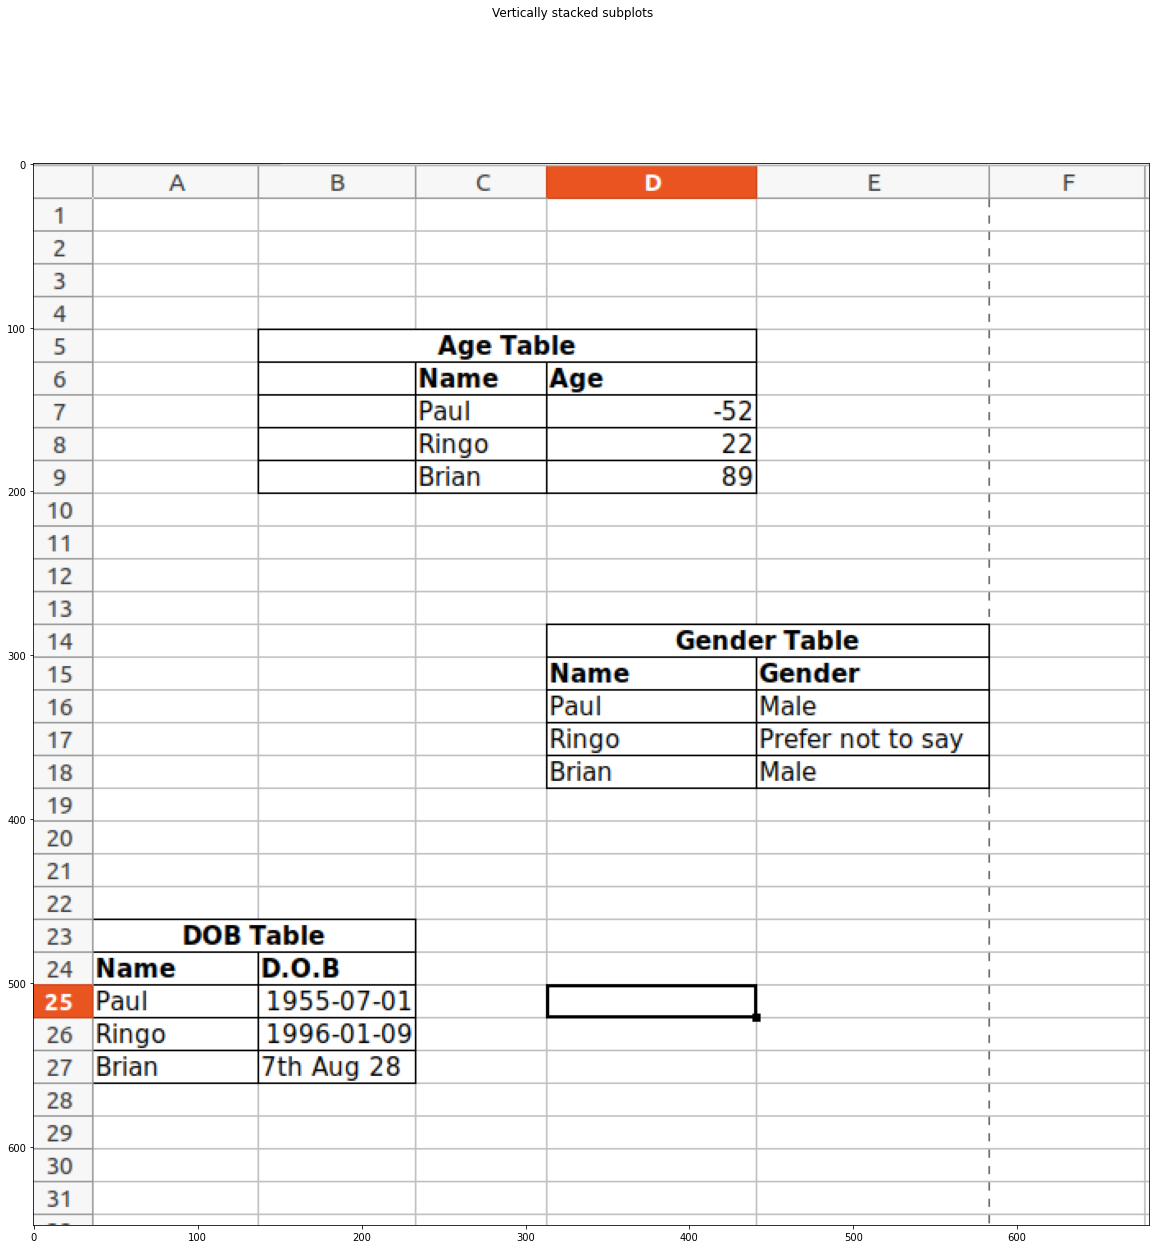

In [115]:
# Convert the image to be suitable for pyplot format and later use it for plotting using pyplot functions
#im2 = cv2.imread('./images/landscape.jpg')
fig, axs = plt.subplots(1 , figsize=(20,20))
fig.suptitle('Vertically stacked subplots')
axs.imshow(plt_format(img))
#axs[1].imshow(plt_format(im2))